### Esercitazione 5 - Medie Mobili
#### Argomenti

* medie mobili, semplici ed esponenziali
* backtesting di una (semplice) strategia

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import MetaTrader5 as mt5
import mplfinance as mpf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
connected = mt5.initialize(login=5776609, server="ActivTrades-Server", password='YDSNcmto')

if connected:
    candles = pd.DataFrame(mt5.copy_rates_from_pos('EURUSD', mt5.TIMEFRAME_H1, 0, 500))
    mt5.shutdown()
else:
    print('MT5 account error.')

candles['time'] = pd.to_datetime(candles['time'], unit='s')
candles.set_index('time', inplace=True)

candles.head()

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2022-09-16 15:00:00,0.99550,0.99762,0.99529,0.99736,10303,5,0
2022-09-16 16:00:00,0.99727,1.00360,0.99710,1.00299,14207,5,0
2022-09-16 17:00:00,1.00300,1.00315,1.00000,1.00115,8783,5,0
2022-09-16 18:00:00,1.00114,1.00191,1.00006,1.00065,3785,5,0
2022-09-16 19:00:00,1.00066,1.00105,0.99927,0.99932,2465,5,0


In [3]:
def get_moving_average(candles, window=14):
    candles = candles.copy()
    candles['mean'] = candles['close'].rolling(window=window).mean()
    return candles

candles = get_moving_average(candles)

In [5]:
candles.head(20)

,open,high,low,close,tick_volume,spread,real_volume,mean
time,,,,,,,,
2022-09-16 15:00:00,0.99550,0.99762,0.99529,0.99736,10303,5,0,NaN
2022-09-16 16:00:00,0.99727,1.00360,0.99710,1.00299,14207,5,0,NaN
2022-09-16 17:00:00,1.00300,1.00315,1.00000,1.00115,8783,5,0,NaN
2022-09-16 18:00:00,1.00114,1.00191,1.00006,1.00065,3785,5,0,NaN
2022-09-16 19:00:00,1.00066,1.00105,0.99927,0.99932,2465,5,0,NaN
2022-09-16 20:00:00,0.99932,1.00076,0.99926,1.00022,2621,5,0,NaN
2022-09-16 21:00:00,1.00022,1.00140,1.00020,1.00124,3905,5,0,NaN
2022-09-16 22:00:00,1.00123,1.00148,1.00077,1.00139,1705,5,0,NaN
2022-09-18 23:00:00,1.00084,1.00152,1.00062,1.00135,605,8,0,NaN


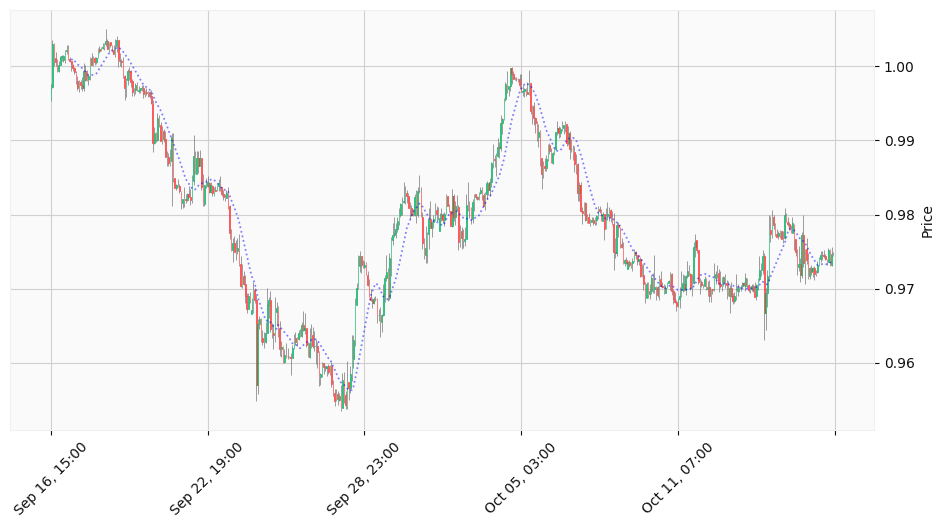

In [6]:
ma_plot = mpf.make_addplot(candles['mean'], linestyle='dotted', alpha=0.5, color='blue')
mpf.plot(candles, addplot=ma_plot, type='candle', style='yahoo', figsize=(12, 6))

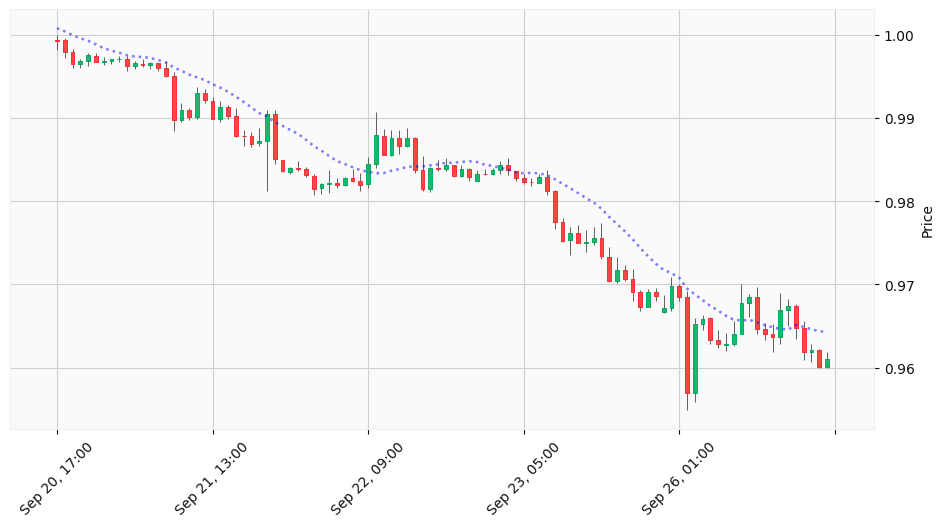

In [7]:
ma_plot = mpf.make_addplot(candles['mean'][50:150], linestyle='dotted', alpha=0.5, color='blue')
mpf.plot(candles[50:150], addplot=ma_plot, type='candle', style='yahoo', figsize=(12, 6))

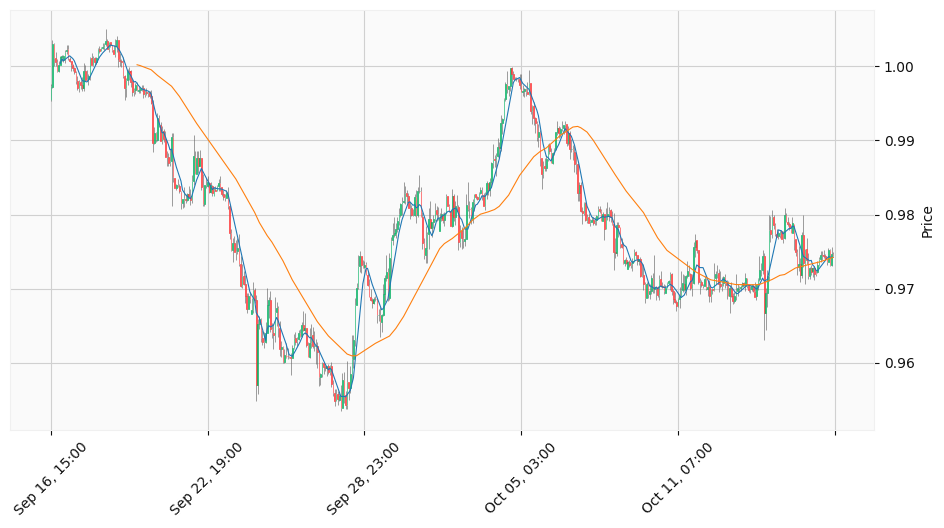

In [8]:
mpf.plot(candles, mav=(7, 56), type='candle', style='yahoo', figsize=(12, 6))

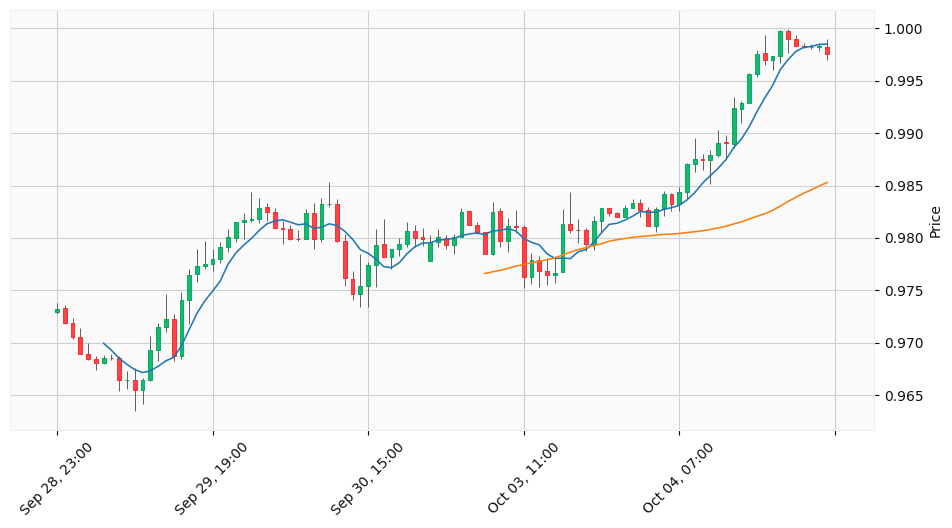

In [9]:
mpf.plot(candles[200:300], mav=(7, 56), type='candle', style='yahoo', figsize=(12, 6))

#### Media Mobile Esponenziale

In Pandas, di default, è calcolata secondo la seguente formula formula:    
<img src="images/ewm_pandas.png"/>    

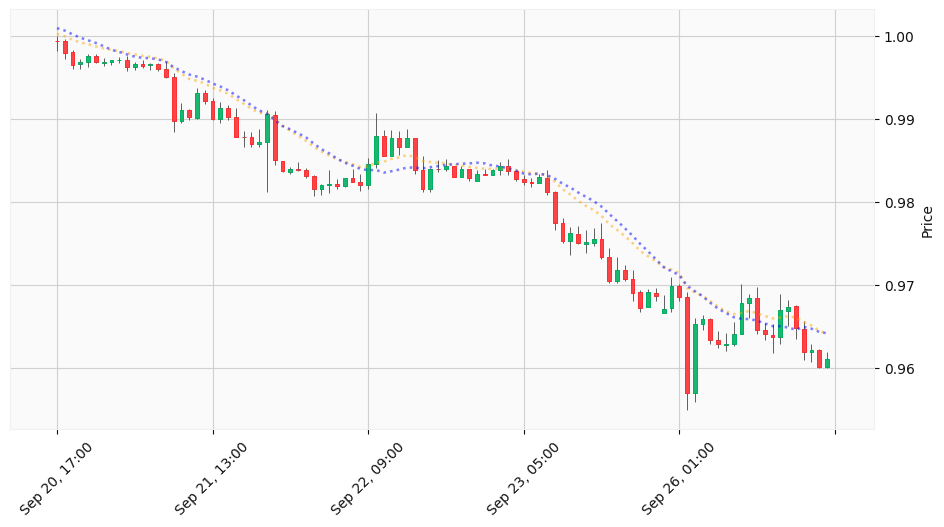

In [10]:
# media mobile esponenziale

def get_exp_moving_average(candles, window=14):
    candles = candles.copy()
    candles['exp_mean'] = candles['close'].ewm(span=window).mean()
    return candles

connected = mt5.initialize(login=5776609, server="ActivTrades-Server", password='YDSNcmto')

if connected:
    candles = pd.DataFrame(mt5.copy_rates_from_pos('EURUSD', mt5.TIMEFRAME_H1, 0, 500))
    mt5.shutdown()
else:
    print('MT5 account error.')

candles['time'] = pd.to_datetime(candles['time'], unit='s')
candles.set_index('time', inplace=True)

window = 15

candles = get_moving_average(candles, window=window)
candles = get_exp_moving_average(candles, window=window)

ma_plot = mpf.make_addplot(candles['mean'][50:150], linestyle='dotted', alpha=0.5, color='blue')
ema_plot = mpf.make_addplot(candles['exp_mean'][50:150], linestyle='dotted', alpha=0.5, color='orange')
mpf.plot(candles[50:150], addplot=[ema_plot, ma_plot], type='candle', style='yahoo', figsize=(12, 6))

In [11]:
connected = mt5.initialize(login=5776609, server="ActivTrades-Server", password='YDSNcmto')

if connected:
    candles = pd.DataFrame(mt5.copy_rates_from_pos('EURUSD', mt5.TIMEFRAME_H4, 0, 250))
    mt5.shutdown()
else:
    print('MT5 account error.')

candles['time'] = pd.to_datetime(candles['time'], unit='s')
candles.set_index('time', inplace=True)

In [12]:
def get_moving_averages(candles, window_fast=5, window_slow=56):
    candles = candles.copy()
    candles['mean_fast'] = candles['close'].rolling(window=window_fast).mean()
    candles['mean_slow'] = candles['close'].rolling(window=window_slow).mean()
    return candles

window_fast = 11
window_slow = 29

candles = get_moving_averages(candles, window_fast=window_fast, window_slow=window_slow)
candles = candles[window_slow:]

In [13]:
print('backtesting:', candles.iloc[0].name, '...', candles.iloc[-1].name, '\n')
i = 2
wallet = 0
played = 0
wins = 0
buy_candles = []
sell_candles = []
while i < len(candles):
    if candles.iloc[i - 1].mean_fast > candles.iloc[i - 1].mean_slow and candles.iloc[i - 2].mean_fast < candles.iloc[i - 2].mean_slow:
        initial_idx = i
        buy_price = candles.iloc[i].open
        sell_price = candles.iloc[i].close
        o = i - 1
        ts_sell = candles.iloc[o].name
        while sell_price > candles.iloc[o].mean_fast and o < len(candles) - 1:
            o += 1
            i += 1
            sell_price = candles.iloc[o].close
            ts_sell = candles.iloc[o].name
        result = sell_price - buy_price
        if result > 0:
            wins += 1
        wallet += result
        played += 1
        print(candles.iloc[initial_idx].name, 'buy:', buy_price, ' -- ', ts_sell, 'sell:', sell_price, ' -> ', result)
        buy_candles.append([pd.to_datetime(candles.iloc[initial_idx].name), buy_price, pd.to_datetime(candles.iloc[o].name), sell_price])
    if candles.iloc[i - 1].mean_fast < candles.iloc[i - 1].mean_slow and candles.iloc[i - 2].mean_fast > candles.iloc[i - 2].mean_slow:
        initial_idx = i
        sell_price = candles.iloc[i].open
        buy_price = candles.iloc[i].close
        o = i - 1
        ts_buy = candles.iloc[o].name
        while buy_price < candles.iloc[o].mean_fast and o < len(candles) - 1:
            o += 1
            i += 1
            buy_price = candles.iloc[o].close
            ts_buy = candles.iloc[o].name
        result = sell_price - buy_price
        if result > 0:
            wins += 1
        wallet += result
        played += 1
        print(candles.iloc[initial_idx].name, 'sell:', sell_price, ' -- ', ts_buy, 'buy:', buy_price, ' -> ', result)
        sell_candles.append([candles.iloc[initial_idx].name, sell_price, candles.iloc[o].name, buy_price])
    i += 1

print('\nwallet:', wallet)
print('vinte', wins, 'su', played)

backtesting: 2022-08-28 20:00:00 ... 2022-10-17 08:00:00 

2022-09-02 16:00:00 sell: 0.99989  --  2022-09-06 00:00:00 buy: 0.99637  ->  0.0035199999999999676
2022-09-08 12:00:00 buy: 0.99977  --  2022-09-13 12:00:00 sell: 1.00318  ->  0.003409999999999913
2022-09-14 16:00:00 sell: 0.99915  --  2022-09-15 08:00:00 buy: 0.9994  ->  -0.00024999999999997247
2022-09-20 04:00:00 buy: 1.00235  --  2022-09-20 12:00:00 sell: 0.9982  ->  -0.004150000000000098
2022-09-21 12:00:00 sell: 0.99304  --  2022-09-27 04:00:00 buy: 0.9651  ->  0.027940000000000076
2022-09-29 20:00:00 buy: 0.97801  --  2022-10-03 08:00:00 sell: 0.97627  ->  -0.0017400000000000748
2022-10-07 08:00:00 sell: 0.98009  --  2022-10-11 16:00:00 buy: 0.9752  ->  0.004890000000000061
2022-10-14 04:00:00 buy: 0.97995  --  2022-10-14 08:00:00 sell: 0.97295  ->  -0.007000000000000006

wallet: 0.026619999999999866
vinte 4 su 8


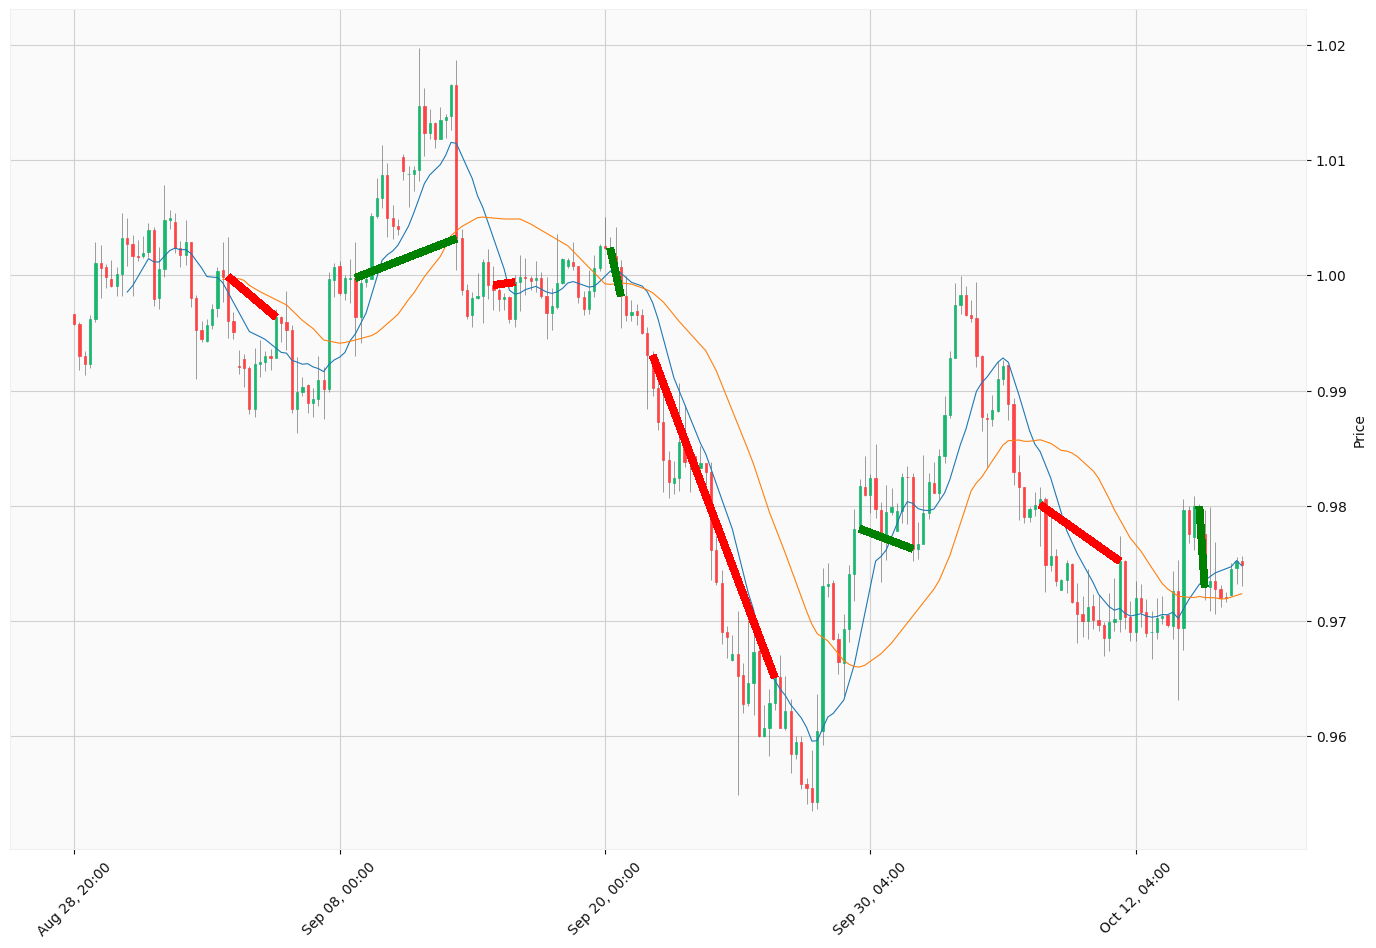

In [14]:
colors = []
for _ in buy_candles:
    colors.append('g')
for _ in sell_candles:
    colors.append('r')

lines = [[(b[0], b[1]), (b[2], b[3])] for b in buy_candles]

for s in sell_candles:
    lines.append([(s[0], s[1]), (s[2], s[3])])

mpf.plot(
    candles, 
    alines=dict(alines=lines, colors=colors, linewidths=5), 
    mav=(window_fast, window_slow), 
    type='candle',
    style='yahoo',
    figsize=(18, 12)
)